# Sistema de Equações Lineares

## Algoritmo do Método de Eliminação de Gauss

**Fase de Eliminação** Vamos olhar as equações em algum instante durante a fase de eliminação. Assuma que as primeiras *k* linhas de **A** já tenham sido transformadas em uma matriz triangular superior. Consequentemente, a equação pivotal corrente é a *k*-ésima equação e todas as equações abaixo ainda devem ser transformadas. Essa situação é ilustrada pela matriz de coeficientes abaixo. 

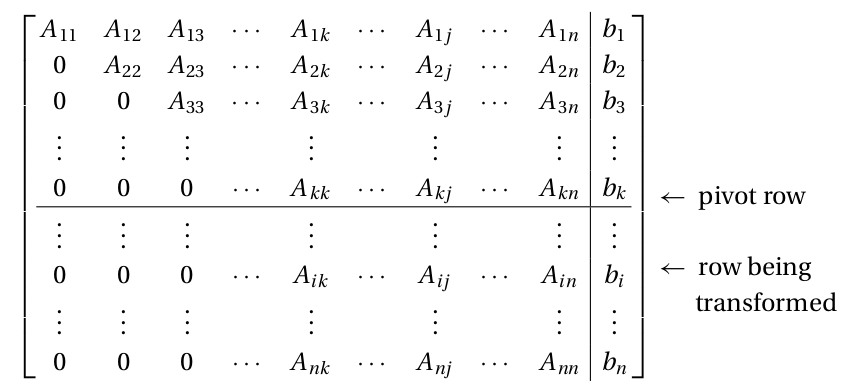

Note que os componentes da matriz **A** não são os mesmos da matriz original (exceto a primeira linha) porque eles já foram alterados pelo processo de eliminação. O mesmo se aplica para o vetor **b** de termos independentes.

Sendo a *i*-ésima linha abaixo da linha pivotal a ser transformada, ou seja, o elemento $A_{ik}$ será eliminado. Fazemos isso através da multiplicação da linha pivotal por $\lambda = A_{ik}/A_{kk}$ e subtraindo-a da *i*-ésima linha: 

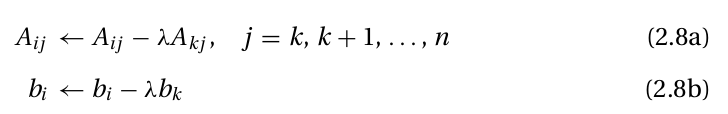

Para transformar toda a matriz de coeficientes em uma matriz triangular superior, $k$ e $i$ nas Eq. 2.8 devem ter os intervalos: 

* $k = 1, 2, ..., n-1$ (escolhe a linha pivotal - o último elemento da diagonal principal não conta, pois não há elemento abaixo dele a ser eliminado)
* $i = k + 1, k + 2, ..., n$ (escolhe a linha a ser transformada - sempre uma unidade maior que a linha pivotal):

In [ ]:
import numpy as np

In [ ]:
def gaussElimin(a, b):
    n = len(b)
  # Elimination Phase
    for k in range(0, n-1):
        for i in range(k+1, n):
           if a[i, k] != 0.0:
               lam = a[i, k]/a[k, k]
               a[i, k+1:n] = a[i, k+1:n] - lam*a[k, k+1:n]
               b[i] = b[i] - lam*b[k]
# Back substitution
    for k in range(n-1, -1, -1):
        b[k] = (b[k] - np.dot(a[k, k+1:n], b[k+1:n]))/a[k, k]
    return b

Veja que para eliminar operações desnecessárias o algoritimo parte dos seguintes pressupostos:

* Se $A_{ik}$ é $0.0$, a transformação da linha $i$ é pulada. 
* O índice $j$ na Eq. 2.8a inicia com $k + 1$ ao invés de $k$. Consequentemente, $A_{ik}$ não é substituído por zero, mantendo seu valor original. Como a fase de substituição retroativa não usa a porção triangular inferior seu conteúdo é irrelevante.  

Em Python, o índice da matriz parte de $A_{00}$, diferentemente da formalização que parte de $A_{11}$. Logo, todos os índices do algoritmo devem refletir isso.

**Fase da Substituições Retroativas** Após a Eliminação de Gauss, a matriz dos coeficientes fica da seguinte forma (lembre-se que no algoritmo terá uma forma diferente):

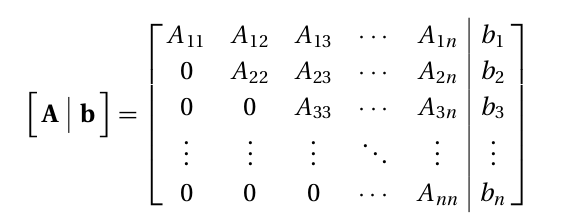

A última equação, $A_{nn}x_{n} = b_{n}$ é resolvida por $x_{n} = b_{n}/A_{nn}$. A fórmula geral é (ver slides da disciplina):

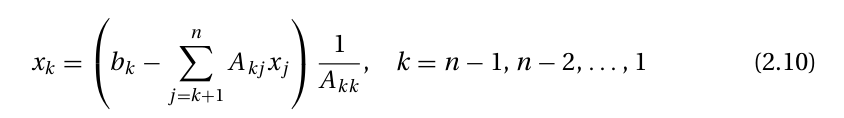

*Ver o final do algoritmo acima. A matriz $b$ é utilizada para armazenar a resolução de $x_{k}$. Note que o algoritmo utiliza a operação $.dot()$ para representar o somatório da formalização, ou seja, o produto escalar.

**Execução do Programa**

In [ ]:
z = np.array([[2.0, 3.0, -1.0],
             [4.0, 4.0, -3.0],
             [2.0, -3.0, 1.0]])

k = np.array([[5.0, 3.0, -1.0]])

In [ ]:
x = gaussElimin(z, k[0])

In [ ]:
print('x = \n', x)